In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
## 일반적으로 Mean Square Error 
## 특별하게는 Mean Absolute Error
## MSE, MAE 모두 Cost 로 정의 가능

x_data = [1.0,2,3]
y_data = [1.0,2,3]
x = tf.constant( x_data, tf.float32)
y = tf.constant( y_data, tf.float32)


In [4]:
# tensorflow 함수를 그래프모드로 변환하기위한 decorator 함수 (@tf.function)를 사용하면 계산그래프 속도향상 가능 
@tf.function 
def tf_mse(w, b=0.0, x=x, y=y):
    hx = w*x 
    return tf.reduce_mean( (hx-y)**2 + b)
    
@tf.function 
def tf_mse_grad(w, b=0.0, x=x, y=y):        
    hx = w*x + b
    return tf.reduce_mean((hx-y)*2*x)
 

In [21]:
w  = tf.Variable(5.0) ; # 임의로 initial w
lr = tf.constant(0.1)  ; # learning rate

for epoch in range(10):
    c = tf_mse(w)
    g = tf_mse_grad(w)
    print("w =%8.4f, mse = %8.4f, mse_grad= %8.4f"% (w,c,g))
    # w = w - lr * g
    w.assign_sub(lr*g)

print("w (final) =",w)


w =  5.0000, mse =  74.6667, mse_grad=  37.3333
w =  1.2667, mse =   0.3319, mse_grad=   2.4889
w =  1.0178, mse =   0.0015, mse_grad=   0.1659
w =  1.0012, mse =   0.0000, mse_grad=   0.0111
w =  1.0001, mse =   0.0000, mse_grad=   0.0007
w =  1.0000, mse =   0.0000, mse_grad=   0.0000
w =  1.0000, mse =   0.0000, mse_grad=   0.0000
w =  1.0000, mse =   0.0000, mse_grad=   0.0000
w =  1.0000, mse =   0.0000, mse_grad=   0.0000
w =  1.0000, mse =   0.0000, mse_grad=   0.0000
w (final) = <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.0>


In [22]:
print(tf_mse(-5,0,x,y).numpy())
print(tf_mse( 0,0,x,y).numpy())
print(tf_mse( 1,0,x,y).numpy())
print(tf_mse( 5,0,x,y).numpy())
print(tf_mse(10,0,x,y).numpy())


168.0
4.6666665
0.0
74.666664
378.0


 -5.0000,168.0000
 -3.8889,111.5391
 -2.7778, 66.6008
 -1.6667, 33.1852
 -0.5556, 11.2922
  0.5556,  0.9218
  1.6667,  2.0741
  2.7778, 14.7490
  3.8889, 38.9465
  5.0000, 74.6667


(0.0, 80.0)

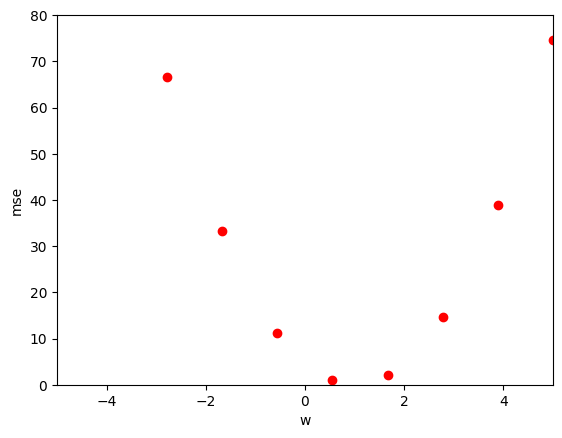

In [24]:
for w in tf.constant(np.linspace(-5,5,10),dtype=tf.float32):
    cost=tf_mse(w,0,x,y)
    print("%8.4f,%8.4f"%(w,cost))
    plt.plot(w,cost,'ro')
plt.xlabel('w')
plt.ylabel('mse')
plt.xlim(-5,5)
plt.ylim(0,80)